The **Breast Cancer Wisconsin (Diagnostic) dataset** is one of the most well-known datasets in the machine learning and medical research communities. Here's a detailed overview of it:

---

## 📊 **Dataset Overview**

* **Name**: Breast Cancer Wisconsin (Diagnostic) Data Set
* **Source**: University of Wisconsin Hospitals, Madison — Dr. William H. Wolberg
* **Collected**: 1989–1991
* **Samples**: 569
* **Features**: 30 numeric features (real-valued)
* **Target classes**: 2 (Malignant and Benign)

---

## 🧬 **Purpose**

The primary goal of this dataset is to **classify tumors as either malignant (cancerous) or benign (non-cancerous)** based on features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. It’s used as a **supervised learning classification** problem.

---

## 🔍 **Features Description**

All features are computed from images of cell nuclei and represent different aspects of their shape and texture. Each of the following 10 measurements was computed for each cell nucleus:

1. Radius
2. Texture
3. Perimeter
4. Area
5. Smoothness
6. Compactness
7. Concavity
8. Concave points
9. Symmetry
10. Fractal dimension

Each of these is calculated for:

* **Mean**
* **Standard error**
* **Worst** (largest mean value)

This results in **30 features**:

* `radius_mean`, `texture_mean`, ..., `fractal_dimension_mean`
* `radius_se`, `texture_se`, ..., `fractal_dimension_se`
* `radius_worst`, `texture_worst`, ..., `fractal_dimension_worst`

---

## 🎯 **Target Variable**

* `diagnosis`:

  * **M** = Malignant
  * **B** = Benign

---

## 🧪 **Use in Machine Learning**

### Common Applications:

* Binary classification tasks
* Model benchmarking and evaluation
* Feature selection experiments
* Dimensionality reduction demonstrations (e.g., PCA, t-SNE)

### Algorithms Often Applied:

* Logistic Regression
* Support Vector Machines (SVM)
* Random Forests
* K-Nearest Neighbors (KNN)
* Neural Networks

---

## 📁 **Availability**

This dataset is publicly available and can be found:

* On the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
* Directly in `scikit-learn`:

  ```python
  from sklearn.datasets import load_breast_cancer
  data = load_breast_cancer()
  ```

---

## ⚠️ **Considerations**

* **Balanced Classes**: Slightly imbalanced — \~63% benign, \~37% malignant
* **No missing values**
* **Normalized features** often required for many algorithms

---

If you'd like, I can also help with:

* Visualizing this dataset (e.g., correlation heatmaps, PCA plots)
* Building a classification model (code example)
* Performing feature importance analysis

Would you like to dive into one of these?


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



In [4]:
data=load_breast_cancer()
X,y=data.data,data.target



In [5]:

print(data.feature_names)
print("*"*50)
print(data.target_names)
# Optional: convert to DataFrame for exploration
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
**************************************************
['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Scale
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


# PCA

Original shape:  (455, 30)
Reduced shape:  (455, 10)


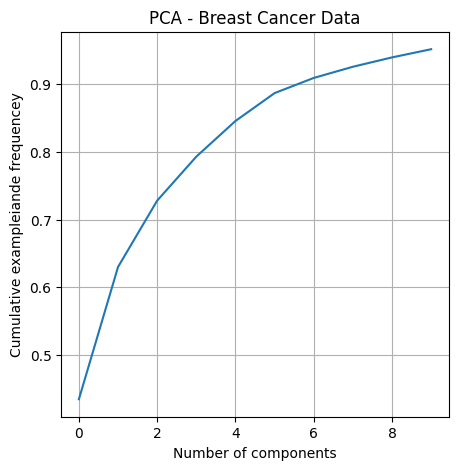

In [7]:
pca=PCA(n_components=10)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)
print("Original shape: ",X_train_scaled.shape)
print("Reduced shape: ",X_train_pca.shape)

plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative exampleiande frequencey")
plt.title("PCA - Breast Cancer Data")
plt.grid()
plt.show()





# K-Nearest Neighbors

In [8]:
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca,y_train)
y_pred=knn.predict(X_test_pca)
print("k-NN Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


k-NN Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Naive Bayes

In [9]:
nb=GaussianNB()
nb.fit(X_train_pca,y_train)
y_pred=nb.predict(X_test_pca)
print("naive bayes Accuracy ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

naive bayes Accuracy  0.9210526315789473
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.91      0.97      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



# ID3 Decision Tree

In [10]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train_pca,y_train)
y_pred=dt.predict(X_test_pca)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



In [11]:
from sklearn.tree import export_text

# Print the decision tree rules
tree_rules = export_text(dt, feature_names=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
print(tree_rules)


|--- PC1 <= -0.01
|   |--- PC1 <= -1.05
|   |   |--- PC4 <= 0.13
|   |   |   |--- class: 1
|   |   |--- PC4 >  0.13
|   |   |   |--- PC3 <= -0.49
|   |   |   |   |--- PC1 <= -1.97
|   |   |   |   |   |--- PC6 <= 0.53
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- PC6 >  0.53
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- PC1 >  -1.97
|   |   |   |   |   |--- class: 0
|   |   |   |--- PC3 >  -0.49
|   |   |   |   |--- PC4 <= 0.14
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PC4 >  0.14
|   |   |   |   |   |--- class: 1
|   |--- PC1 >  -1.05
|   |   |--- PC2 <= -0.65
|   |   |   |--- PC8 <= -0.10
|   |   |   |   |--- PC6 <= -0.48
|   |   |   |   |   |--- PC10 <= -0.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- PC10 >  -0.43
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- PC6 >  -0.48
|   |   |   |   |   |--- class: 1
|   |   |   |--- PC8 >  -0.10
|   |   |   |   |--- class: 0
|   |   |--- PC2 >  -0.65
|   |   |   |--- P

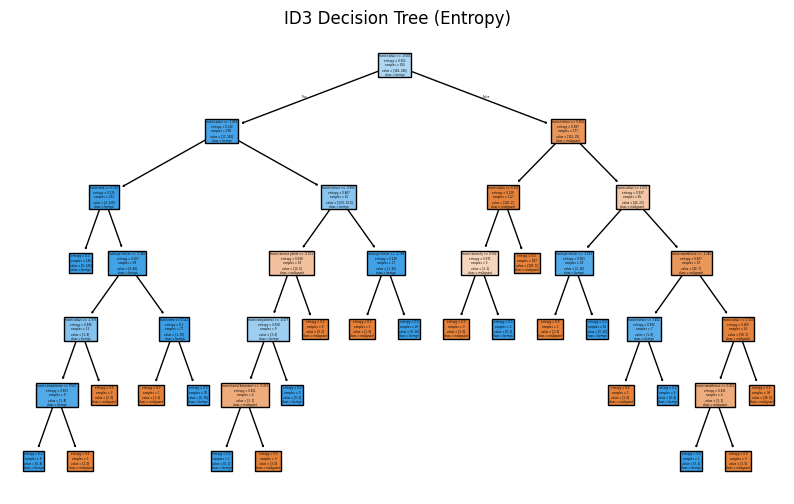

In [14]:
# Plot tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(10, 6))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("ID3 Decision Tree (Entropy)")
plt.show()